<h1>Импорт библиотек

In [27]:
%pip install numpy
%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.6 kB ? eta -:--:--
     --------------------- --------------- 61.4/104.6 kB 648.1 kB/s eta 0:00:01
     ------------------------------------ 104.6/104.6 kB 857.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.1/8.1 MB 4.3 MB/s eta 0:00:02
   - -------------------------------------- 0.3/8.1 MB 3.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.1 MB 3.1 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.1 MB 5.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 6.7 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.1 MB 8.1 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.1 MB 11.8 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 15.9 MB/s eta 0:00:01
   -----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [11]:
def sum_prod(X, V):
    return sum(np.dot(matrix, vector) for matrix, vector in zip(X, V))

def test_sum_prod():
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([1, 2]), np.array([3, 4])]
    result = sum_prod(X, V)
    expected = np.array([5, 11]) + np.array([39, 53])
    assert np.array_equal(result, expected)
    print("Все тесты пройдены")

test_sum_prod()

Test passed for sum_prod


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [19]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    M = np.array([[0.4, 0.6], [0.1, 0.9]])
    assert np.array_equal(binarize(M), np.array([[0, 1], [0, 1]]))
    assert np.array_equal(binarize(M, 0.7), np.array([[0, 0], [0, 1]]))
    print("Все тесты пройдены")

test_binarize()

Tests passed for binarize


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [32]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]

def test_unique():
    mat = np.array([[1, 2, 1], [4, 4, 4], [1, 2, 3]])
    assert [list(u) for u in unique_rows(mat)] == [[1, 2], [4], [1, 2, 3]]
    assert [list(u) for u in unique_columns(mat)] == [[1, 4], [2, 4], [1, 3, 4]]
    print("Все тесты пройдены")

test_unique()

Все тесты пройдены


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

C:\Users\Userok\AppData\Local\Temp\ipykernel_18468\2658626675.py:20: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


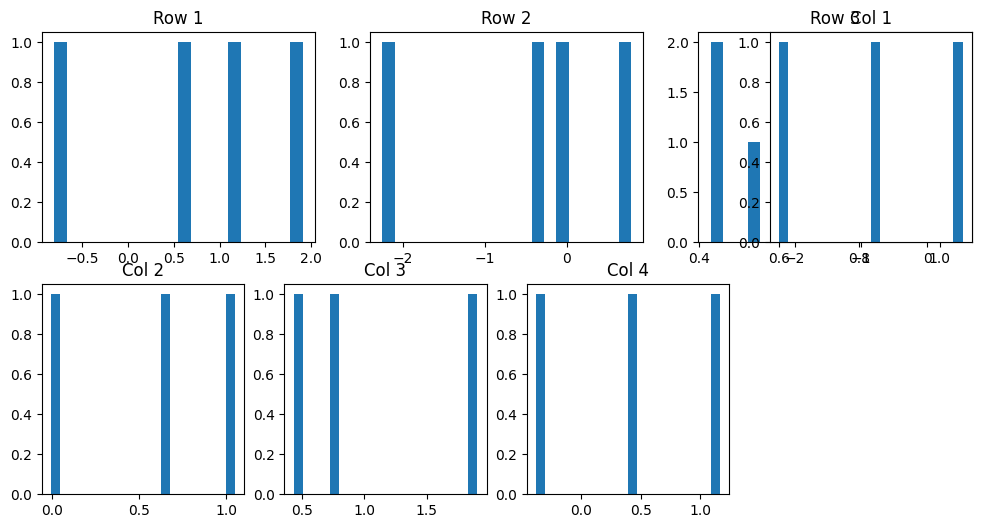

(array([ 0.73466137, -0.46167195,  0.61778846]),
 array([0.98713633, 1.23922224, 0.06343774]),
 array([-0.84117352,  0.57375957,  1.04008481,  0.41503298]),
 array([1.29114763, 0.1901522 , 0.39775899, 0.39590906]))

In [28]:
def analyze_matrix(m, n):
    mat = np.random.normal(0, 1, (m, n))
    
    row_means = np.mean(mat, axis=1)
    row_vars = np.var(mat, axis=1)
    col_means = np.mean(mat, axis=0)
    col_vars = np.var(mat, axis=0)
    
    plt.figure(figsize=(12, 6))
    for i in range(m):
        plt.subplot(2, m, i+1)
        plt.hist(mat[i, :], bins=20)
        plt.title(f"Row {i+1}")
    
    for j in range(n):
        plt.subplot(2, n, m+j+1)
        plt.hist(mat[:, j], bins=20)
        plt.title(f"Col {j+1}")
    
    plt.tight_layout()
    plt.show()
    
    return row_means, row_vars, col_means, col_vars

analyze_matrix(3, 4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [31]:
def chess(m, n, a, b):
    board = np.zeros((m, n))
    board[::2, ::2] = a
    board[1::2, ::2] = b
    board[::2, 1::2] = b
    board[1::2, 1::2] = a
    return board

def test_chess():
    assert np.array_equal(chess(2, 2, 1, 0), np.array([[1, 0], [0, 1]]))
    assert np.array_equal(chess(3, 3, 5, 10), 
           np.array([[5, 10, 5], [10, 5, 10], [5, 10, 5]]))
    print("Все тесты пройдены")

test_chess()

Все тесты пройдены


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

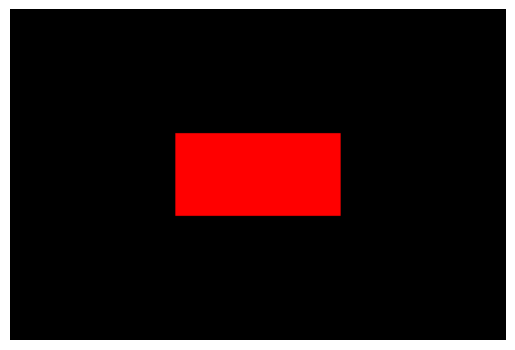

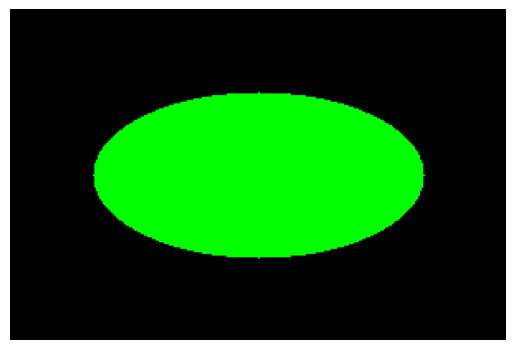

In [29]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.full((m, n, 3), background_color)
    start_i, start_j = (m - a) // 2, (n - b) // 2
    image[start_i:start_i+a, start_j:start_j+b] = rectangle_color
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.full((m, n, 3), background_color)
    center_i, center_j = m // 2, n // 2
    
    for i in range(m):
        for j in range(n):
            if ((i - center_i)/a)**2 + ((j - center_j)/b)**2 <= 1:
                image[i, j] = ellipse_color
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()

draw_rectangle(50, 100, 200, 300, [255, 0, 0], [0, 0, 0])
draw_ellipse(50, 100, 200, 300, [0, 255, 0], [0, 0, 0])

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [24]:
def analyze_time_series(series, window_size=3):
    mean = np.mean(series)
    variance = np.var(series)
    std = np.std(series)
    
    maxima = []
    minima = []
    for i in range(1, len(series)-1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            maxima.append(i)
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            minima.append(i)
    
    moving_avg = np.convolve(series, np.ones(window_size)/window_size, mode='valid')
    
    return {
        'mean': mean,
        'variance': variance,
        'std': std,
        'maxima': maxima,
        'minima': minima,
        'moving_avg': moving_avg
    }

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [30]:
def one_hot_encoding(labels):
    classes = np.unique(labels)
    encoding = np.zeros((len(labels), len(classes)))
    for i, label in enumerate(labels):
        encoding[i, np.where(classes == label)] = 1
    return encoding

def test_one_hot():
    labels = np.array([0, 2, 3, 0])
    expected = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]])
    assert np.array_equal(one_hot_encoding(labels), expected)
    print("Все тесты пройдены")

test_one_hot()

Все тесты пройдены
